In [1]:
import pandas as pd

In [2]:
stk_data=pd.read_csv("Tatacoffee13_21.csv")

In [3]:
stk_data

,Date,Open,High,Low,Close
0,2013-01-01,1410.60,1427.90,1408.30,1415.10
1,2013-01-02,1421.00,1626.60,1416.15,1607.40
2,2013-01-03,1632.55,1673.90,1613.05,1626.20
3,2013-01-04,1627.75,1627.75,1574.60,1579.05
4,2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (2225, 1)


In [6]:
len(data1)

2225

In [7]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1780
X_train length: (1780, 1)
X_test length: (445, 1)
y_train length: (1780, 1)
y_test length: (445, 1)


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from stockFunctions import rmsemape   # import once at the top

trends = ['n', 't', 'c', 'ct']
lags = [1, 2, 3, 4]

for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()
        
        # make prediction
        y_pred = model_fit.predict(len(X_train), len(data1)-1)
        
        # manually compute RMSE (since squared=False not supported)
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        print("Lag={}, Trend={}".format(i, td))
        print(f"RMSE: {rmse:.4f}")
        
        # call your custom rmsemape function
        rmsemape(y_test, y_pred)
        print("************")


Lag=1, Trend=n
RMSE: 0.0589
RMSE-Testset: 0.058859347313836866
maPe-Testset: 108221610722.61273
************
Lag=1, Trend=t
RMSE: 0.0657
RMSE-Testset: 0.06567306536707392
maPe-Testset: 105694109653.11528
************
Lag=1, Trend=c
RMSE: 0.0434
RMSE-Testset: 0.04336525033763366
maPe-Testset: 114804919729.45547
************
Lag=1, Trend=ct
RMSE: 0.1527
RMSE-Testset: 0.15273694386322909
maPe-Testset: 74699776526.65353
************
Lag=2, Trend=n
RMSE: 0.0595
RMSE-Testset: 0.05946957243778428
maPe-Testset: 107811149748.47528
************
Lag=2, Trend=t
RMSE: 0.0533
RMSE-Testset: 0.053333877982384155
maPe-Testset: 110268940666.53214
************
Lag=2, Trend=c
RMSE: 0.0349
RMSE-Testset: 0.03487154364943177
maPe-Testset: 119368707397.77913
************
Lag=2, Trend=ct
RMSE: 0.1515
RMSE-Testset: 0.15147077869434547
maPe-Testset: 72770748055.74287
************
Lag=3, Trend=n
RMSE: 0.0594
RMSE-Testset: 0.05944295500377151
maPe-Testset: 108331645493.58449
************
Lag=3, Trend=t
RMSE: 0.053

In [9]:
len(y_pred)

445

In [29]:
i=2
td='c'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()

# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)

from sklearn.metrics import r2_score, mean_squared_error

# Fix RMSE calculation (manual square root)
mse = (mean_squared_error(y_test,y_pred))**0.5

from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")


Lag=2,Trend=c
RMSE-Testset: 0.03487154364943177
maPe-Testset: 119368707397.77913
************


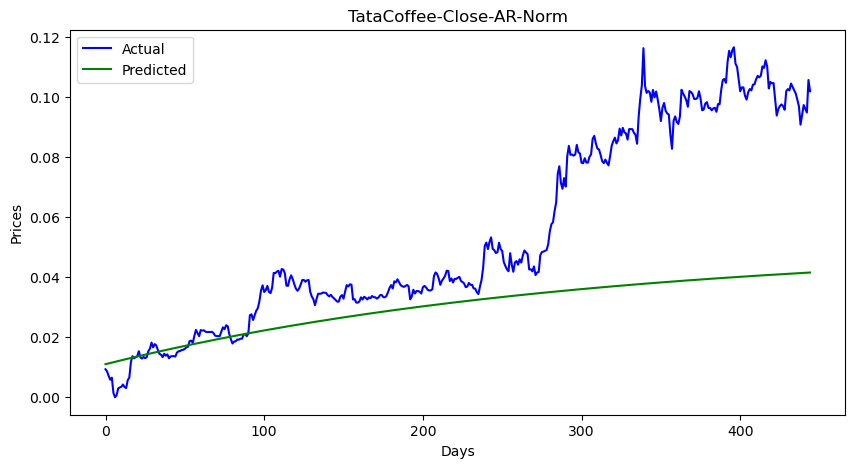

In [30]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [33]:
len(data1)

2225

In [34]:
y_test

array([[0.00931949],
       [0.00856893],
       [0.0070678 ],
       [0.00581686],
       [0.00650488],
       [0.00140731],
       [0.        ],
       [0.00068802],
       [0.0029397 ],
       [0.00325244],
       [0.00350263],
       [0.00422192],
       [0.00337753],
       [0.0030648 ],
       [0.00569177],
       [0.00650488],
       [0.01169627],
       [0.0136665 ],
       [0.01294721],
       [0.01335377],
       [0.01363523],
       [0.01532399],
       [0.01322867],
       [0.01288466],
       [0.01341631],
       [0.01300976],
       [0.01338504],
       [0.01535527],
       [0.01616838],
       [0.01820115],
       [0.0166062 ],
       [0.01770078],
       [0.01723167],
       [0.01573055],
       [0.01444834],
       [0.01416688],
       [0.01335377],
       [0.01447961],
       [0.01382287],
       [0.0142607 ],
       [0.01297848],
       [0.01360395],
       [0.01363523],
       [0.01369777],
       [0.01354141],
       [0.01485489],
       [0.01529272],
       [0.015

In [35]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [36]:
aTestNormTable

,Close
0,0.009319
1,0.008569
2,0.007068
3,0.005817
4,0.006505
...,...
440,0.097323
441,0.096041
442,0.094821
443,0.105673


In [37]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [38]:
actual_stock_price_test_ori

array([[ 64.3 ],
       [ 63.1 ],
       [ 60.7 ],
       [ 58.7 ],
       [ 59.8 ],
       [ 51.65],
       [ 49.4 ],
       [ 50.5 ],
       [ 54.1 ],
       [ 54.6 ],
       [ 55.  ],
       [ 56.15],
       [ 54.8 ],
       [ 54.3 ],
       [ 58.5 ],
       [ 59.8 ],
       [ 68.1 ],
       [ 71.25],
       [ 70.1 ],
       [ 70.75],
       [ 71.2 ],
       [ 73.9 ],
       [ 70.55],
       [ 70.  ],
       [ 70.85],
       [ 70.2 ],
       [ 70.8 ],
       [ 73.95],
       [ 75.25],
       [ 78.5 ],
       [ 75.95],
       [ 77.7 ],
       [ 76.95],
       [ 74.55],
       [ 72.5 ],
       [ 72.05],
       [ 70.75],
       [ 72.55],
       [ 71.5 ],
       [ 72.2 ],
       [ 70.15],
       [ 71.15],
       [ 71.2 ],
       [ 71.3 ],
       [ 71.05],
       [ 73.15],
       [ 73.85],
       [ 74.  ],
       [ 74.55],
       [ 74.65],
       [ 75.2 ],
       [ 76.  ],
       [ 76.3 ],
       [ 79.3 ],
       [ 79.5 ],
       [ 78.35],
       [ 82.05],
       [ 85.25],
       [ 83.55

In [39]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [40]:
actual_stock_price_test_oriA

,Close
0,64.3
1,63.1
2,60.7
3,58.7
4,59.8
...,...
440,205.0
441,202.95
442,201.0
443,218.35


In [41]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [42]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

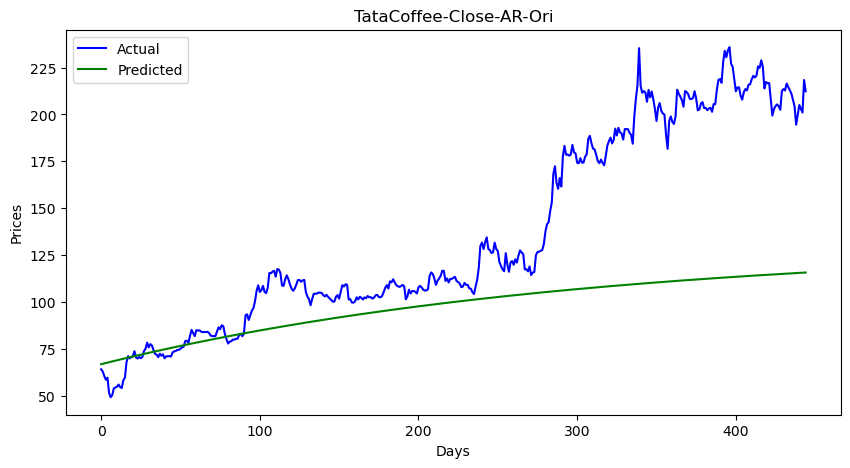

In [43]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [44]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 55.752623986711505
maPe-Testset: 0.2332414626477236


In [45]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [46]:
forecast

array([0.04156393, 0.04159358, 0.04162314, 0.0416526 ])

In [47]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [48]:
forecast_stock_price_test_oriF

,Closefore
0,115.852408
1,115.899822
2,115.947078
3,115.994175
